In [1]:
from brightway2 import *
import cPickle as pickle
from time import time
import numpy as np

In [2]:
ei22 = Database("ecoinvent 2.2")
ei31 = Database("ecoinvent 3.1 cutoff")

In [3]:
def get_keys(db, n=5):
    return [db.random() for x in range(n)]

In [4]:
def normal_lca(db, n=5):
    start = time()
    times = []
    for key in get_keys(db, n):
        lca = LCA({key: 1})
        lca.lci()
        times.append(time() - start)
    return times

In [5]:
def factorize_lca(db, n=5):
    start = time()
    times = []
    keys = get_keys(db, n)
    lca = LCA({keys[0]: 1})
    lca.lci(factorize=True)
    times.append(time() - start)
    for key in keys[1:]:
        lca.redo_lci({key: 1})
        times.append(time() - start)
    return times

Warmup

In [6]:
np.array([factorize_lca(ei31) for x in range(3)])
np.array([factorize_lca(ei22) for x in range(3)])
print "Warmed up"

Warmed up


In [18]:
without_f_22 = np.array([normal_lca(ei22) for x in range(100)])
with_f_22 = np.array([factorize_lca(ei22) for x in range(100)])

In [19]:
without_f_31 = np.array([normal_lca(ei31) for x in range(100)])
with_f_31 = np.array([factorize_lca(ei31) for x in range(100)])

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

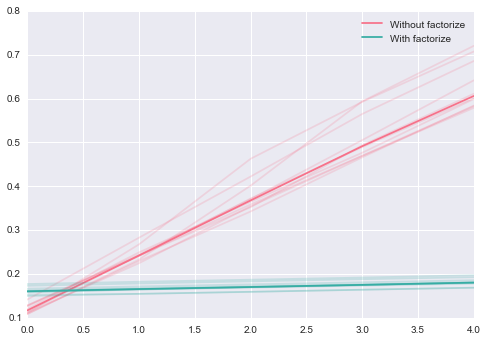

In [11]:
sns.tsplot(np.dstack((without_f_22, with_f_22)), condition=["Without factorize", "With factorize"], color="husl", ci=95, err_style="unit_traces", estimator=np.median)

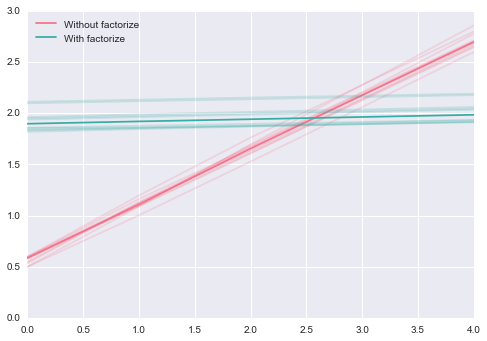

In [12]:
sns.tsplot(np.dstack((without_f_31, with_f_31)), condition=["Without factorize", "With factorize"], color="husl", ci=95, err_style="unit_traces", estimator=np.median)

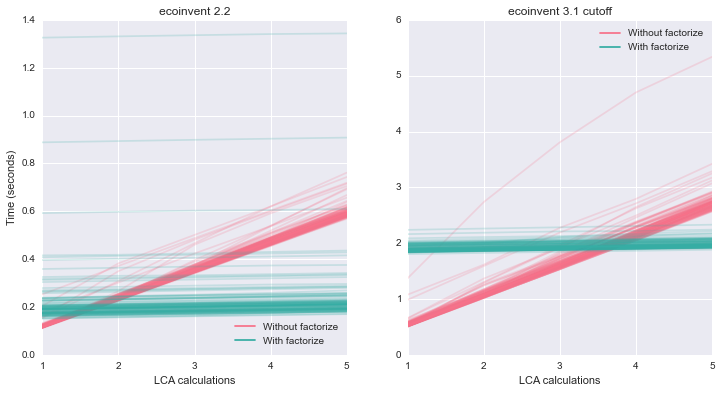

In [20]:
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.subplot(121)
sns.tsplot(np.dstack((without_f_22, with_f_22)), condition=["Without factorize", "With factorize"], color="husl", ci=95, err_style="unit_traces", estimator=np.median)
plt.xticks(range(5), range(1, 6))
plt.ylabel("Time (seconds)")
plt.xlabel("LCA calculations")
plt.title("ecoinvent 2.2")
plt.subplot(122)
sns.tsplot(np.dstack((without_f_31, with_f_31)), condition=["Without factorize", "With factorize"], color="husl", ci=95, err_style="unit_traces", estimator=np.median)
plt.xticks(range(5), range(1, 6))
plt.xlabel("LCA calculations")
plt.title("ecoinvent 3.1 cutoff")
plt.savefig("speed-comparison-factorize.")